#Table of Contents
* [Analysis of Ganglia monitoring data](#Analysis-of-Ganglia-monitoring-data)
* [Ganglia](#Ganglia)
	* [Examples of Ganglia monitored metrics](#Examples-of-Ganglia-monitored-metrics)
	* [RRD reduces time resolution](#RRD-reduces-time-resolution)
		* [A 1-day plot](#A-1-day-plot)
		* [A 1-week plot](#A-1-week-plot)
	* [How to analyse offline the full resolution Ganglia monitoring data](#How-to-analyse-offline-the-full-resolution-Ganglia-monitoring-data)
* [pandas: Python data analysis toolkit](#pandas:-Python-data-analysis-toolkit)
	* [Highligh of (a part of) DataFrames' features I like](#Highligh-of-%28a-part-of%29-DataFrames'-features-I-like)
* [Digressions](#Digressions)
	* [IPython notebook security](#IPython-notebook-security)
	* [Converting your notebook into a HTML presentation](#Converting-your-notebook-into-a-HTML-presentation)
	* [IPython parallel computing](#IPython-parallel-computing)
	* [IPython notebook extensions](#IPython-notebook-extensions)
* [Ganglia metric extraction](#Ganglia-metric-extraction)
	* [Raw data](#Raw-data)
	* [Description: adopting the *parallel* feature](#Description:-adopting-the-*parallel*-feature)
	* [My machine configuration](#My-machine-configuration)
	* [Going parallel](#Going-parallel)
	* [Utility functions to run parallel aggregation](#Utility-functions-to-run-parallel-aggregation)
	* [A simple test](#A-simple-test)
	* [Run Parallel](#Run-Parallel)
	* [Join dataframes](#Join-dataframes)
		* [A multi-index table](#A-multi-index-table)
* [Plot data](#Plot-data)
	* [Utility functions to ease recursive plotting](#Utility-functions-to-ease-recursive-plotting)
		* [plotAllMetrics](#plotAllMetrics)
		* [PlotAllStats](#PlotAllStats)
	* [Load pickle](#Load-pickle)
	* [Plots](#Plots)
		* [Stacked average cpu](#Stacked-average-cpu)
		* [Stacked cpu  median](#Stacked-cpu--median)
		* [unstacked CPU 75%](#unstacked-CPU-75%)
		* [unstacked CPU max](#unstacked-CPU-max)
	* [Example of slicing](#Example-of-slicing)
		* [mean Vs median](#mean-Vs-median)
	* [And now let's add ROOT](#And-now-let's-add-ROOT)
		* [Fitting](#Fitting)
		* [Changing fit range](#Changing-fit-range)
	* [Plot of each single metric](#Plot-of-each-single-metric)
		* [cpu_system plots](#cpu_system-plots)
		* [cpu wio](#cpu-wio)
			* [Reduce y-axis scale](#Reduce-y-axis-scale)
			* [Comment about CPU wio performance](#Comment-about-CPU-wio-performance)
		* [cpu idle](#cpu-idle)
		* [cpu nice](#cpu-nice)
		* [cpu user](#cpu-user)


# Analysis of Ganglia monitoring data

* Goal of this example is to provide a *not-comprehensive* overview of some python tools for data analysis
   * Cover IPython and pandas
   * Going through a concrete use case: 
   
   __Extraction, Transformation, Analysis of Ganglia monitoring data__
   

# Ganglia

* Ganglia is a ***scalable*** monitoring system for distributed computing systems.
    * It is ***open-source*** tool 
    * It is used to monitor cloud resources in WLCG 

<img src="slides/Ganglia_architecture.png" width=400>

* How it works                                           
    * Collects monitoring data from machines                     
    * Performs a ***time-based aggregation***, 
    * Stores the result in a ***Round-Robin Database*** (RRD) 
    * Provides a Web-based presentation layer.


       

* For more information look at the recently submitted proceeding of CHEP2015:
*** Monitoring the delivery of virtualized resources to the LHC experiments ***

## Examples of Ganglia monitored metrics

<img src='slides/Ganglia-1h.png',width=1200>

## RRD reduces time resolution

In order to keep the maximum RRD size fixed over time two approaches can be used
   * Old data is automatically eliminated. 
   * Gradually ***reduce*** the data ***resolution*** along the time axis (*consolidation feature*)
      * Use different consolidation functions (AVG, MIN, MAX, LAST)

### A 1-day plot

* ***5 min aggregation***
<img src='slides/Ganglia-1day.png',width=800>

### A 1-week plot

* ***1 hour aggregation***
<img src='slides/Ganglia-1week.png',width=800>

## How to analyse offline the full resolution Ganglia monitoring data

1. Extract periodically Ganglia data at full time resolution
   * 15 seconds time resolution is kept only for the last hour of data
1. Store data in archive
   * for this purpose CVS files stored on EOS
1. Adopt a suitable tool for the analysis
   * Extract data from CSV and put it in a manageable data structure
   * Do aggregation, selection, data type conversion, statistics extraction, plotting  
   * ***pandas DataFrame*** is suitable for this use case

# pandas: Python data analysis toolkit

From the official documentation: http://pandas.pydata.org/pandas-docs/stable/index.html

* pandas is a Python package providing ***fast, flexible, and expressive data structures*** 
* designed to make working with “relational” or “labeled” data 
* It aims to be the fundamental *high-level building block* for doing *practical* data analysis in Python. 

* pandas is well suited for many *different* kinds of data:

    * Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
    * Ordered and unordered (not necessarily fixed-frequency) time series data.
    * Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
    * The data actually need not be labeled at all to be placed into a pandas data structure
    
* data structures are similar to R data.frame objects    
* GitHub repository: https://github.com/pydata/pandas

## Highligh of (a part of) DataFrames' features I like

* MultiIndex / Advanced Indexing
    * allows quite sophisticated data analysis and manipulation with higher dimensional data. 
    * http://pandas.pydata.org/pandas-docs/stable/advanced.html
    
    
* Loading Data from multi formats


* Apply function 
    * like map, works on a row/columns basis
    * df[['A']].apply(lambda x: x^2)


* Access subset of columns 
    * df[['A','B']]
* SQL-like functions
    * Groupby and statistics
    * Join of dataframes 


* Handling Missing Values
    * df.dropna()
    * df.fillna(something)
        * allows fill values forward/backward methods
        * http://pandas.pydata.org/pandas-docs/version/0.15.0/missing_data.html#filling-missing-values-fillna

* Integration with matplotlib

A nice reading (besides pandas documentation) is
         
         http://www.bigdataexaminer.com/14-best-python-pandas-features/

# Digressions

## IPython notebook security

From IPython documentation

http://ipython.org/ipython-doc/1/interactive/public_server.html#notebook-security


* The IPython notebook web-application is based on a server-client structure. 
* This server uses a two-process kernel architecture based on ZeroMQ, as well as Tornado for serving HTTP requests.
* By default, a notebook server runs on http://127.0.0.1:8888/ and is accessible only from localhost. 

* Two ***main*** messages if you want to access your notebook server from a multi-user machine

    * protect your notebook server with a simple single password by setting the NotebookApp.password configurable.
    * use SSL, so that your password is not sent unencrypted by your browser. You can start the notebook to communicate via a secure protocol mode using a self-signed certificate

## Converting your notebook into a HTML presentation

* IPython generates a suitable .html file that can be open in a browser. 

* using the reveals.js Javascript library it generates a HTML slideshow 

   * It must be served by an HTTP server. The easiest way to get this is to add --post serve on the command-line.
```
    $ ipython nbconvert notebook.ipynb --to slides --post serve
```

* https://github.com/hakimel/reveal.js

## IPython parallel computing

* IPython provides an architecture for parallel and distributed computing
   * http://ipython.org/ipython-doc/dev/parallel/index.html
  
* It supports:
    * Single program, multiple data (SPMD) parallelism.
    * Multiple program, multiple data (MPMD) parallelism.
    * Message passing using MPI.
    * deployment of IPython on EC2 (using StarCluster)
    * Creation of LoadBalanced instances and AsyncResult
    * ...

## IPython notebook extensions

* IPython notebook Javascript extensions can improve your user experience
    * Extend functionality of what done in the Browser
       * generate Table of Content
       * cell spell checking
       * store cell execution time
* There are many IPython extensions available in public repositories
   * https://github.com/ipython-contrib/IPython-notebook-extensions/wiki/Home_3x
   * https://github.com/minrk/ipython_extensions
   * http://calicoproject.org/ICalico#Calico_Notebook_Extensions
   * or just use your preferred web search engine 

# Ganglia metric extraction

## Raw data

In our case raw data are CSV files containing for each Ganglia metric the following quantities
```
"metric_name",timestamp,metric_value,"vm_ip_address"
```

In [ ]:
cat data/2015-03-11/cpu_user.csv


"METRIC","TIMESTAMP","VALUE","HOSTNAME"
"cpu_user",1426026570.0,1.5,"212.128.104.134"
"cpu_user",1426026585.0,1.5,"212.128.104.134"
"cpu_user",1426026600.0,1.5,"212.128.104.134"
"cpu_user",1426026615.0,1.8,"212.128.104.134"
"cpu_user",1426026630.0,2.0,"212.128.104.134"
"cpu_user",1426026645.0,2.0,"212.128.104.134"
"cpu_user",1426026660.0,2.0,"212.128.104.134"
"cpu_user",1426026675.0,2.0,"212.128.104.134"
"cpu_user",1426026690.0,2.0,"212.128.104.134"

***Files are organised in daily directories***

In [9]:
ls -l data/2015-03-11/

total 5
-rw-r--r--. 1 giordano zh 474 Jun  2 16:09 cpu_idle.csv
-rw-r--r--. 1 giordano zh 464 Jun  2 16:09 cpu_nice.csv
-rw-r--r--. 1 giordano zh 483 Jun  2 16:09 cpu_system.csv
-rw-r--r--. 1 giordano zh 464 Jun  2 16:09 cpu_user.csv
-rw-r--r--. 1 giordano zh 455 Jun  2 16:09 cpu_wio.csv


In [25]:
ls -lh /data/giordano/Ganglia-Atos-root/2015-03-29/

total 3.6G
-rw-r--r--. 1 giordano zh 706M Mar 29 23:52 cpu_idle.csv
-rw-r--r--. 1 giordano zh 733M Mar 29 23:52 cpu_nice.csv
-rw-r--r--. 1 giordano zh 751M Mar 29 23:52 cpu_system.csv
-rw-r--r--. 1 giordano zh 720M Mar 29 23:52 cpu_user.csv
-rw-r--r--. 1 giordano zh 693M Mar 29 23:52 cpu_wio.csv


## Description: adopting the *parallel* feature

This section implements extraction procedures for a given Ganglia CPU metric.

Definition of Ganglia CPU metrics can be found in the following thread https://www.mail-archive.com/ganglia-general%40lists.sourceforge.net/msg00463.html

```
cpu_user, cpu_system, cpu_nice, cpu_idle, cpu_wio are 
the "Percentage of CPU cycles spent in ..." since last reading (which is around 10-20 seconds apart).
The only metric which is measured since boottime is cpu_aidle ( CPU 
Absolute IDLE ) which is the % time since boot the CPU has been idle.
```

The extraction approach profits of the ***IPython notebook parallel*** feature.

Running in parallel on many nodes allows to perform a rapid extraction of metrics.

Ultimately metrics are aggregated in a single pickle for further usage

## My machine configuration

* 64 CPU
* 516 GB RAM

In [1]:
!free -m

             total       used       free     shared    buffers     cached
Mem:        516872     158403     358469          1        324     132820
-/+ buffers/cache:      25257     491614
Swap:        15999          0      15999


In [2]:
!lscpu | head

Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                64
On-line CPU(s) list:   0-63
Thread(s) per core:    2
Core(s) per socket:    8
Socket(s):             4
NUMA node(s):          4
Vendor ID:             GenuineIntel


## Going parallel

In [2]:
from IPython import parallel
clients = parallel.Client()
clients.block = False  # use synchronous computations
print clients.ids
lview = clients.load_balanced_view()
print lview

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
<LoadBalancedView None>


In [3]:
%%px --local
import numpy as np
import matplotlib
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%%px --local
%pylab inline
import pandas as pd
import datetime

Populating the interactive namespace from numpy and matplotlib
[stdout:0] Populating the interactive namespace from numpy and matplotlib
[stdout:1] Populating the interactive namespace from numpy and matplotlib
[stdout:2] Populating the interactive namespace from numpy and matplotlib
[stdout:3] Populating the interactive namespace from numpy and matplotlib
[stdout:4] Populating the interactive namespace from numpy and matplotlib
[stdout:5] Populating the interactive namespace from numpy and matplotlib
[stdout:6] Populating the interactive namespace from numpy and matplotlib
[stdout:7] Populating the interactive namespace from numpy and matplotlib
[stdout:8] Populating the interactive namespace from numpy and matplotlib
[stdout:9] Populating the interactive namespace from numpy and matplotlib
[stdout:10] Populating the interactive namespace from numpy and matplotlib
[stdout:11] Populating the interactive namespace from numpy and matplotlib
[stdout:12] Populating the interactive namespac

## Utility functions to run parallel aggregation

In [5]:
%%px --local
def mymessage(x): print "[%s] %s" %(datetime.datetime.now(),x)

def LoadTransform(inputCSV, Tshort = 60.,aggrMode={'VALUE':'mean'}):
    mymessage("start reading CSV %s" % inputCSV)
    
    # load input data from CSV
    # Exclude rows with larger number of columns
    adf = pd.read_csv(inputCSV,error_bad_lines=False,sep=',')
    
    # Exclude rows with smaller number of columns
    df = adf[adf.notnull().all(axis=1)]
    mymessage("finished reading CSV")
    
    # short window aggregation
    df.loc[:,'TIMESTAMP'] = df['TIMESTAMP'].astype(float)
    df.loc[:,'saggr'] = (np.trunc(df.TIMESTAMP/Tshort)*Tshort)
    
    # force type
    # http://stackoverflow.com/questions/25397057/getting-average-of-pandas-with-groupby-getting-dataerror-no-numeric-types-to-a
    df.loc[:,'saggr'] = df['saggr'].astype(float)
    df.loc[:,'VALUE'] = df['VALUE'].astype(float)
    
    # average per each HOSTNAME in the short window aggregation
    gdf = df.groupby(by=['HOSTNAME','saggr'])
    
    # intermediate df, reset index to move back HOSTNAME and saggr in columns
    idf = gdf.agg(aggrMode).reset_index()
    
    # final aggregation
    #idf['aggr'] = (np.trunc(idf.saggr/Taggregation)*Taggregation
    #              ).apply(lambda x:datetime.datetime.fromtimestamp(x))
    idf.loc[:,'dtime'] = idf['saggr'].apply(lambda x:datetime.datetime.fromtimestamp(x))

    gdf = idf.groupby(by=['dtime'])
    sdf = gdf.VALUE.describe()
    mymessage("going to convert s to d")   
    return sdf.unstack(level=1)
    
def tryLoadTransform(inputCSV, Tshort = 60.,aggrMode={'VALUE':'mean'}):
    try:
        return LoadTransform(inputCSV, Tshort,aggrMode)
    except Exception, err:
        mymessage("Exception in node running on %s"%inputCSV)
        print(Exception)
        print str(err)
        return None

def runParallel(inputList,Taggregation = 300.,aggrMode={'VALUE':'mean'}):
    lview.block = False
    res = lview.map(tryLoadTransform, 
                    inputList,
                    np.repeat(Taggregation, len(inputList)),
                    np.repeat(aggrMode, len(inputList)))
    import time
    while not res.ready():
        print res.progress
        time.sleep(5)
    print res.ready()
    return res

def mergeAll(res):
    isFirst=True
    for res_df in res.result:
        if res_df is None:
            print "res_df is None"
            res.display_outputs()
            continue
        if isFirst:
            print 'res_df\n', res_df.keys()        
            full_df = res_df
            isFirst = False
        else:
            full_df = full_df.append(res_df)#, ignore_index=True)
    print 'size ', len(full_df)
    return full_df

## A simple test

In [15]:
adf = tryLoadTransform('/data/giordano/Ganglia-Atos-root/2015-03-07/cpu_system.csv',Tshort = 3600.)

[2015-06-15 18:46:58.705975] start reading CSV /data/giordano/Ganglia-Atos-root/2015-03-07/cpu_system.csv
[2015-06-15 18:47:07.551257] finished reading CSV
[2015-06-15 18:47:11.365658] going to convert s to d


Skipping line 434697: expected 4 fields, saw 6



In [16]:
adf.head()

count      mean       std       min       25%       50%  \
dtime                                                                          
2015-03-06 23:00:00   1932  7.644111  0.452435  5.243264  7.481120  7.672309   
2015-03-07 00:00:00   1932  7.618039  0.402652  4.950333  7.459208  7.617597   
2015-03-07 01:00:00   1932  7.216690  0.452707  4.607917  6.984785  7.225111   
2015-03-07 02:00:00   1932  4.943160  0.870357  3.638444  4.334042  4.727181   
2015-03-07 03:00:00   1932  4.841058  0.876337  3.578222  4.239299  4.641708   

                          75%       max  
dtime                                    
2015-03-06 23:00:00  7.867517  9.208542  
2015-03-07 00:00:00  7.798500  9.222056  
2015-03-07 01:00:00  7.471667  9.175306  
2015-03-07 02:00:00  5.209014  8.691889  
2015-03-07 03:00:00  5.076229  8.733139

## Run Parallel

In [32]:
def extractTopickle(metric):
    try:
        csvList = [('/data/giordano/Ganglia-Atos-root/2015-03-{:0>2d}/%s.csv'%(metric)).format(i) 
               for i in range(1,32)]
        print csvList[:2]
        resVect = runParallel(csvList,Taggregation = 3600.,aggrMode={'VALUE':'mean'})
        gangliaRes = mergeAll(resVect)
        gangliaRes.to_pickle('data/ganglia-%s.pkl'%metric)
        return gangliaRes
    except:
        return None

In [33]:
# Ganglia metrics
metrics="cpu_user, cpu_system, cpu_nice, cpu_idle, cpu_wio".replace(" " ,"").split(",")

In [34]:
#Running in parallel
dictofMetrics={metric: extractTopickle(metric) for metric in metrics}

['/data/giordano/Ganglia-Atos-root/2015-03-01/cpu_user.csv', '/data/giordano/Ganglia-Atos-root/2015-03-02/cpu_user.csv']
0
4
13
27
True
res_df
Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')
size  770
['/data/giordano/Ganglia-Atos-root/2015-03-01/cpu_system.csv', '/data/giordano/Ganglia-Atos-root/2015-03-02/cpu_system.csv']
0
4
12
24
30
True
res_df
Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')
size  770
['/data/giordano/Ganglia-Atos-root/2015-03-01/cpu_nice.csv', '/data/giordano/Ganglia-Atos-root/2015-03-02/cpu_nice.csv']
0
4
12
27
True
res_df
Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')
size  770
['/data/giordano/Ganglia-Atos-root/2015-03-01/cpu_idle.csv', '/data/giordano/Ganglia-Atos-root/2015-03-02/cpu_idle.csv']
0
4
13
25
True
res_df
Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')
size  770
['/data/giordano/

In [35]:
# Result
for k,v in dictofMetrics.items():
    print '%s \n %s' %(k,v.keys())

cpu_system 
 Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')
cpu_nice 
 Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')
cpu_wio 
 Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')
cpu_user 
 Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')
cpu_idle 
 Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')


In [36]:
dictofMetrics['cpu_system'].head(2)

count      mean       std       min       25%       50%  \
dtime                                                                          
2015-02-28 23:00:00    417  4.065653  0.168733  3.879454  3.994317  4.035464   
2015-03-01 00:00:00    416  3.880946  0.096207  3.727222  3.821646  3.858250   

                         75%       max  
dtime                                   
2015-02-28 23:00:00  4.11000  6.500000  
2015-03-01 00:00:00  3.91809  4.600417

## Join dataframes

In [37]:
isFirst = True
for k,v in dictofMetrics.items():
    print k
    v.columns = pd.MultiIndex.from_product([k,v.keys()],
                                                 names=['ametric', 'astat'])
    if isFirst:
        isFirst = False
        tdf = v
    else:
        tdf = tdf.join(v,how="outer")

cpu_system
cpu_nice
cpu_wio
cpu_user
cpu_idle


### A multi-index table

In [38]:
tdf.head()

ametric             cpu_system                                          \
astat                    count      mean       std       min       25%   
dtime                                                                    
2015-02-28 23:00:00        417  4.065653  0.168733  3.879454  3.994317   
2015-03-01 00:00:00        416  3.880946  0.096207  3.727222  3.821646   
2015-03-01 01:00:00        416  4.240041  0.378095  3.848667  3.974806   
2015-03-01 02:00:00        417  4.075319  0.452180  3.727722  3.867778   
2015-03-01 03:00:00        421  4.147061  1.734586  3.727028  3.869028   

ametric                                            cpu_nice             \
astat                     50%       75%        max    count       mean   
dtime                                                                    
2015-02-28 23:00:00  4.035464  4.110000   6.500000      417  94.167585   
2015-03-01 00:00:00  3.858250  3.918090   4.600417      416  94.563075   
2015-03-01 01:00:00  4.067153  4.447035   5.546972      416  86.170331   
2015-03-01 02:00:00  3.929778  4.033500  10.227544      417  88.920503   
2015-03-01 03:00:00  3.919944  4.037750  24.057917      421  93.394633   

ametric                ...      cpu_user            cpu_idle            \
astat                  ...           75%        max    count      mean   
dtime                  ...                                               
2015-02-28 23:00:00    ...      1.180328  50.300000      417  0.479684   
2015-03-01 00:00:00    ...      1.086111   2.212083      416  0.485034   
2015-03-01 01:00:00    ...      1.774229   2.335750      416  7.728319   
2015-03-01 02:00:00    ...      1.132306  51.687719      417  5.467121   
2015-03-01 03:00:00    ...      1.084806  22.205813      421  1.188570   

ametric                                                                  \
astat                      std       min       25%       50%        75%   
dtime                                                                     
2015-02-28 23:00:00   1.824402  0.000000  0.103115  0.364262   0.545738   
2015-03-01 00:00:00   1.067036  0.030833  0.281813  0.376597   0.481667   
2015-03-01 01:00:00  13.303983  0.027361  0.365424  0.545153  11.033375   
2015-03-01 02:00:00  11.420791  0.142556  0.452972  0.623639   0.986361   
2015-03-01 03:00:00   6.965337  0.024806  0.232667  0.327500   0.451944   

ametric                         
astat                      max  
dtime                           
2015-02-28 23:00:00  33.300000  
2015-03-01 00:00:00  15.251972  
2015-03-01 01:00:00  65.939861  
2015-03-01 02:00:00  55.750972  
2015-03-01 03:00:00  72.022708  

[5 rows x 40 columns]

In [39]:
tdf.to_pickle('data/ganglia-cpu-metrics.pkl')

# Plot data

In [40]:
from matplotlib import gridspec
import matplotlib.ticker as plticker

## Utility functions to ease recursive plotting



### plotAllMetrics

In [41]:
def plotAllMetrics(tdf,astat='mean',isStacked=True, ymax=130, kind='area'):
    #NB The following two lines are the only ones neede to slice the dataframe and produce a plot 
    mdf = tdf.xs(astat,axis=1,level='astat')
    ax = mdf.plot(figsize(16,8), stacked = isStacked, kind=kind,alpha=.7,linewidth=2)
    
    # All what follows is to decorate plots 
    loc = plticker.LinearLocator(numticks=32) #MultipleLocator(base=1.7) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
    ax.set_ylim(0,ymax)
    ax.set_xlabel('',size=16)
    ax.set_ylabel('CPU metric [%]',size=16)
    ax.fmt_xdata = DateFormatter('%b-%d')
    ax.xaxis.set_major_formatter(DateFormatter("%a-%d"))
    ax.legend(loc='best')
    plt.tight_layout()


### PlotAllStats

In [42]:
def getOptimalBinSize(data):
    qtl = np.percentile(data,[25,75])
    h = -2. * np.subtract(*qtl)/np.power(len(list(data)),1./3.)
    print 'bin size %s' %h
    return h

In [43]:
def plotAllStats(pdf,ametric='cpu_system', ylim=(0,0), ylog=False, kind='area'):
    tdf = pdf.xs(ametric,axis=1,level='ametric')
    fig = plt.figure(figsize=(16, 8)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 
    axs = [plt.subplot(gs[i]) for i in range(0,2)]

    ax = axs[0]
    tdf.plot(y=['50%','mean'], kind='line',color=['b','g'],alpha=1, ax=ax,rot=90,linewidth=2)
    #tdf['mean'].plot(ax = ax, style = 'b-')
    ax.fill_between(tdf.index.values, tdf['25%'], tdf['75%'], facecolor='yellow', alpha=0.4, label='IQR')

    lines, labels = ax.get_legend_handles_labels()
    import matplotlib.patches as mpatches
    lines.append(mpatches.Patch(color='y',alpha=.3 ))
    #ax.legend(lines, ['50%','mean','IRQ'], loc='upper left')  # legend for first two lines only
    ax.legend(lines, ['50%','mean','IRQ'],loc='best')
    
    if ylim == (0,0):
        ylim=(np.amin(tdf['min']),np.amax(tdf['max']))   
    ax.set_ylim(ylim)
    
    if ylog: 
        ax.set_yscale('log')

    ax = axs[1]
    tdf.plot(y=['50%','mean'], ax = ax, kind='line', style = ['b','g'], alpha=1, rot=90,linewidth=2)
    #ax.set_yscale('log')
    #ax.fill_between(gdf.index, gdf['25%'], gdf['75%'], facecolor='yellow', alpha=0.4, label='3 std range')

    loc = plticker.LinearLocator(numticks=32) #MultipleLocator(base=1.7) # this locator puts ticks at regular intervals
    for i in range(0,2):
        ax = axs[i]
        ax.xaxis.set_major_locator(loc)
        ax.set_xlabel('',size=16)
        ax.set_ylabel(ametric,size=16)
        ax.fmt_xdata = DateFormatter('%b-%d')
        ax.xaxis.set_major_formatter(DateFormatter("%a-%d"))


    plt.tight_layout()
    
    astat = 'mean'
    bin_size = getOptimalBinSize(tdf[astat].values); 
    (min_edge, max_edge) = ylim
    Nbins = int(round((max_edge-min_edge)/bin_size))
    bin_list = np.linspace(min_edge, max_edge, Nbins)
    tdf.hist(astat,bins=bin_list)
    #tdf.plot(x='mean',y='50%',kind='scatter')

    print tdf.query("%s>%s & %s<%s"%(astat,min_edge,astat,max_edge)).describe()

## Load pickle

In [44]:
%pylab inline
import pandas as pd
import datetime

Populating the interactive namespace from numpy and matplotlib


In [45]:
pdf = pd.read_pickle('data/ganglia-cpu-metrics.pkl')

In [46]:
pdf.keys()

MultiIndex(levels=[[u'cpu_idle', u'cpu_nice', u'cpu_system', u'cpu_user', u'cpu_wio'], [u'25%', u'50%', u'75%', u'count', u'max', u'mean', u'min', u'std']],
           labels=[[2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [3, 5, 7, 6, 0, 1, 2, 4, 3, 5, 7, 6, 0, 1, 2, 4, 3, 5, 7, 6, 0, 1, 2, 4, 3, 5, 7, 6, 0, 1, 2, 4, 3, 5, 7, 6, 0, 1, 2, 4]],
           names=[u'ametric', u'astat'])

In [47]:
pdf.head(5)

ametric             cpu_system                                          \
astat                    count      mean       std       min       25%   
dtime                                                                    
2015-02-28 23:00:00        417  4.065653  0.168733  3.879454  3.994317   
2015-03-01 00:00:00        416  3.880946  0.096207  3.727222  3.821646   
2015-03-01 01:00:00        416  4.240041  0.378095  3.848667  3.974806   
2015-03-01 02:00:00        417  4.075319  0.452180  3.727722  3.867778   
2015-03-01 03:00:00        421  4.147061  1.734586  3.727028  3.869028   

ametric                                            cpu_nice             \
astat                     50%       75%        max    count       mean   
dtime                                                                    
2015-02-28 23:00:00  4.035464  4.110000   6.500000      417  94.167585   
2015-03-01 00:00:00  3.858250  3.918090   4.600417      416  94.563075   
2015-03-01 01:00:00  4.067153  4.447035   5.546972      416  86.170331   
2015-03-01 02:00:00  3.929778  4.033500  10.227544      417  88.920503   
2015-03-01 03:00:00  3.919944  4.037750  24.057917      421  93.394633   

ametric                ...      cpu_user            cpu_idle            \
astat                  ...           75%        max    count      mean   
dtime                  ...                                               
2015-02-28 23:00:00    ...      1.180328  50.300000      417  0.479684   
2015-03-01 00:00:00    ...      1.086111   2.212083      416  0.485034   
2015-03-01 01:00:00    ...      1.774229   2.335750      416  7.728319   
2015-03-01 02:00:00    ...      1.132306  51.687719      417  5.467121   
2015-03-01 03:00:00    ...      1.084806  22.205813      421  1.188570   

ametric                                                                  \
astat                      std       min       25%       50%        75%   
dtime                                                                     
2015-02-28 23:00:00   1.824402  0.000000  0.103115  0.364262   0.545738   
2015-03-01 00:00:00   1.067036  0.030833  0.281813  0.376597   0.481667   
2015-03-01 01:00:00  13.303983  0.027361  0.365424  0.545153  11.033375   
2015-03-01 02:00:00  11.420791  0.142556  0.452972  0.623639   0.986361   
2015-03-01 03:00:00   6.965337  0.024806  0.232667  0.327500   0.451944   

ametric                         
astat                      max  
dtime                           
2015-02-28 23:00:00  33.300000  
2015-03-01 00:00:00  15.251972  
2015-03-01 01:00:00  65.939861  
2015-03-01 02:00:00  55.750972  
2015-03-01 03:00:00  72.022708  

[5 rows x 40 columns]

## Plots

### Stacked average cpu

NB: Given the definition of Ganglia CPU metrics, being the _"Percentage of CPU cycles spent since the last measurement"_ (which is around 10-20 seconds apart), the values $V_{m,t}$ with $m$ index of measurement and $t$ index on sampling time satisfy the proprierty that

$${\rm TotP}_t = \sum_{m}V_{m,t} = 100\%$$

If aggregation method implemented in Ganglia-extract-metrics adopt as aggregation function the *average* over the aggregation time interval $\Delta_T$, each aggregated metric $A_{m,T}$ is equivalent to 

$$A_{m,T} =  \frac{\sum_{t\in[T,T+ \Delta_T]}V_{m,t}}{n}$$ 

The sum over all metrics will then be

$$ {\rm TotP}_T = \sum_{m}A_{m,T} =  
\sum_{m} \frac{\sum_{t\in[T,T+ \Delta_T]}V_{m,t}}{\sum_{t\in[T,T+ \Delta_T]} 1} = 
\frac{ \sum_{m} \sum_{t\in[T,T+ \Delta_T]}V_{m,t}}{n} =
\frac{ \sum_{t\in[T,T+ \Delta_T]}\sum_{m} V_{m,t}}{n} =
\frac{ \sum_{t\in[T,T+ \Delta_T]} 100\% }{n} =
\frac{ n 100\% }{n} = 100\%
$$

because of the commutativity of addition.

This property will clearly not be valid for other statistics, such as percentiles or maximum

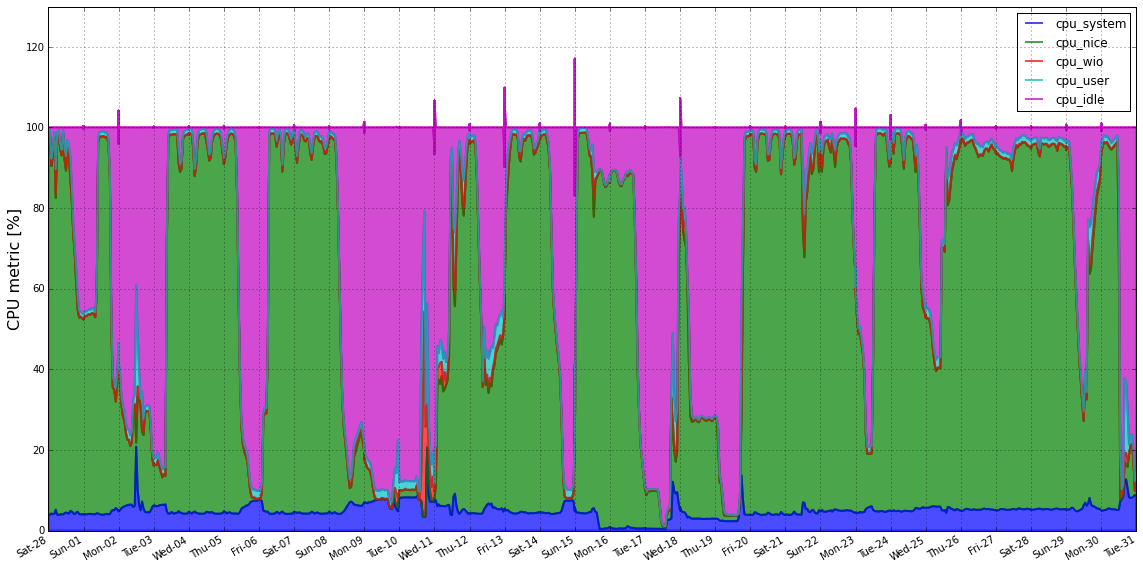

In [33]:
# Stacked average cpu
plotAllMetrics(pdf,astat='mean',isStacked=True)

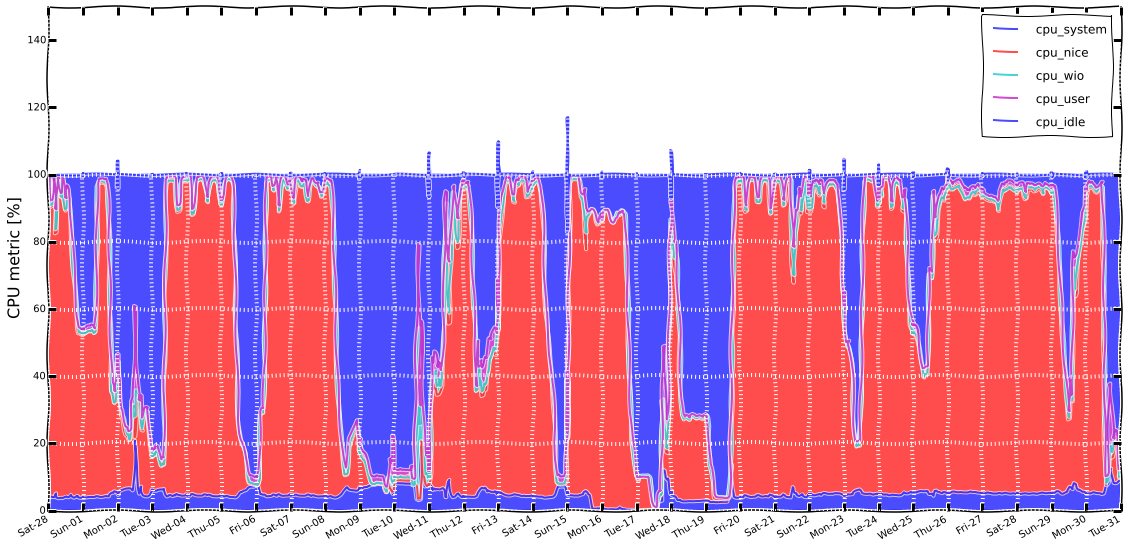

In [36]:
# Stacked average cpu (xkcd style)
with plt.xkcd():
    plotAllMetrics(pdf,astat='mean',isStacked=True, ymax=150)

### Stacked cpu  median

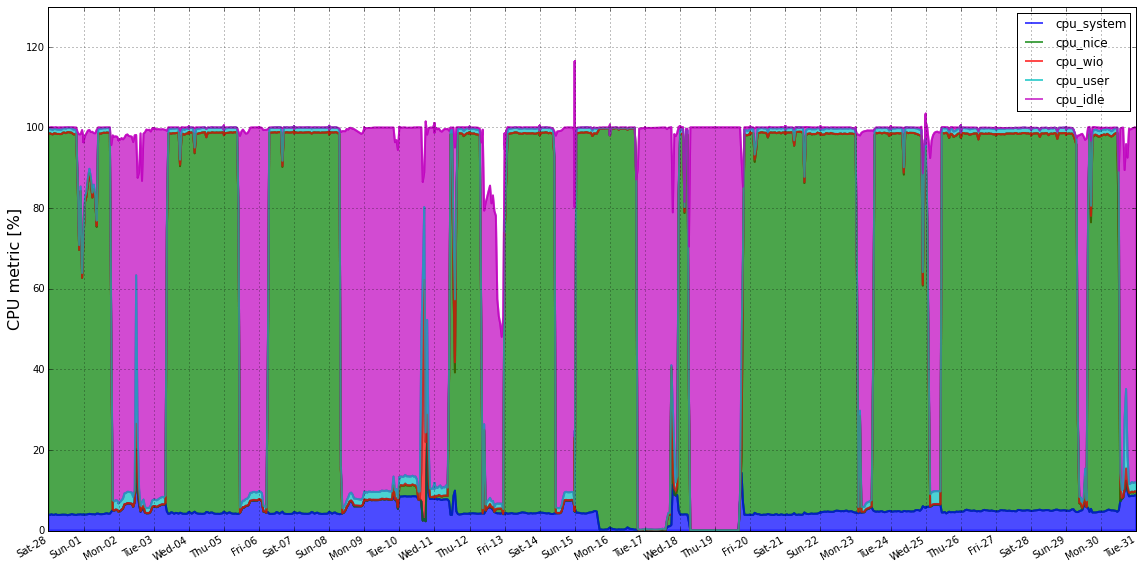

In [37]:
plotAllMetrics(pdf,astat='50%',isStacked=True)

### unstacked CPU 75%

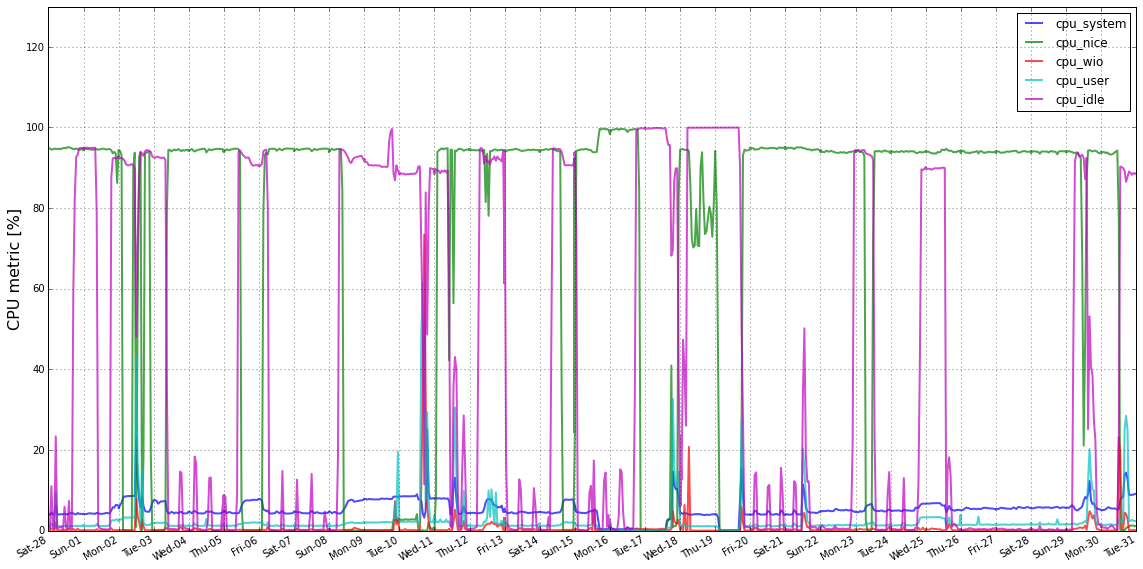

In [38]:
plotAllMetrics(pdf,astat='75%',isStacked=False,kind='line')

### unstacked CPU max

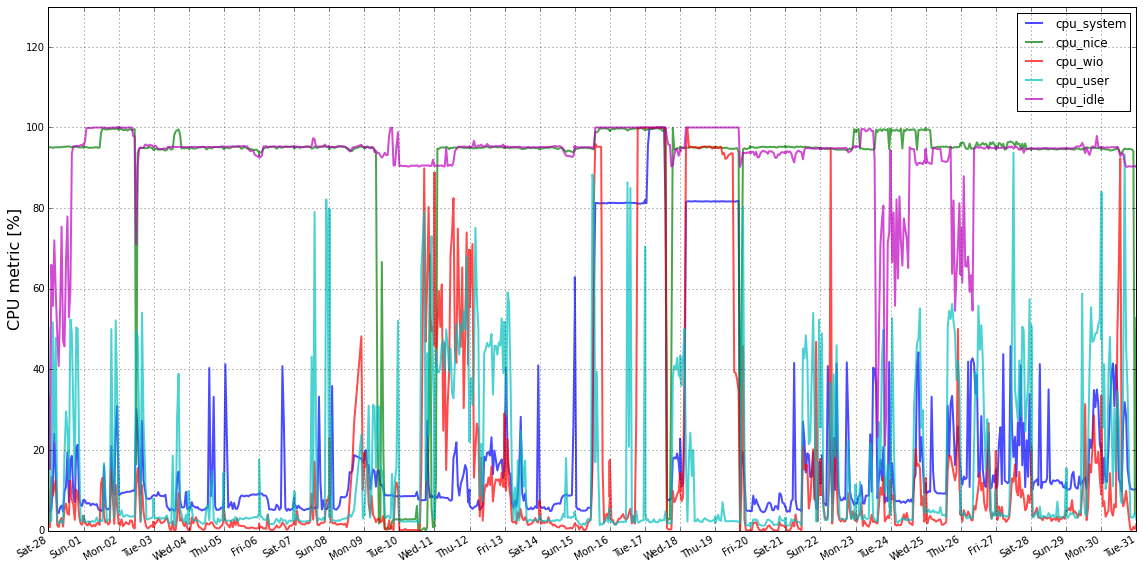

In [77]:
plotAllMetrics(pdf,astat='max',isStacked=False, kind='line')

## Example of slicing

### mean Vs median

In [78]:
xdf = pdf.xs('cpu_system',axis=1,level='ametric')

In [79]:
xdf.head(1)

astat                count      mean       std       min       25%       50%  \
dtime                                                                          
2015-02-28 23:00:00    417  4.065653  0.168733  3.879454  3.994317  4.035464   

astat                 75%  max  
dtime                           
2015-02-28 23:00:00  4.11  6.5

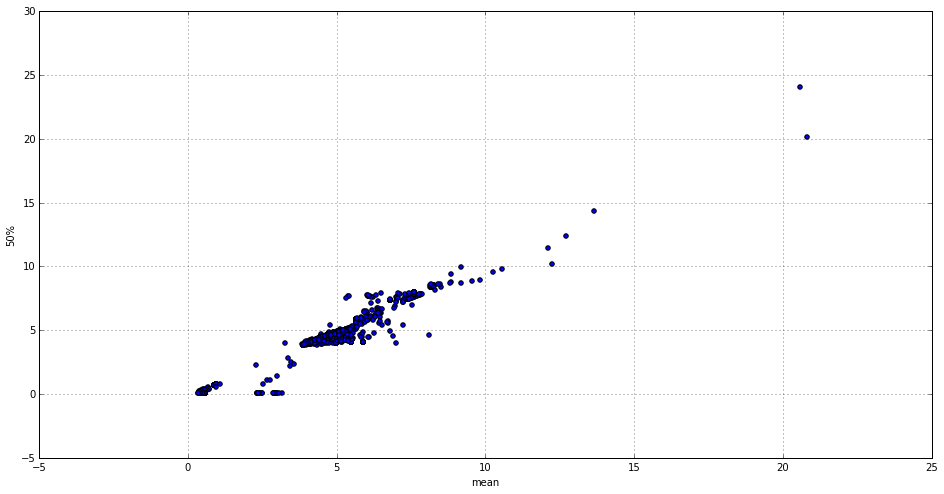

In [80]:
xdf.plot(x='mean',y='50%',kind='scatter')

## And now let's add ROOT

In [88]:
from ROOT import gROOT
from ROOT import TCanvas, TH2F
import rootdisplay

In [125]:
gROOT.Reset()
h2D = TH2F("h2D","h2D",60,0,30.,60,0,30.)
for val in xdf[['mean','50%']].values:
    h2D.Fill(val[0],val[1])
h2D.Draw("box")

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: h2D (Potential memory leak).


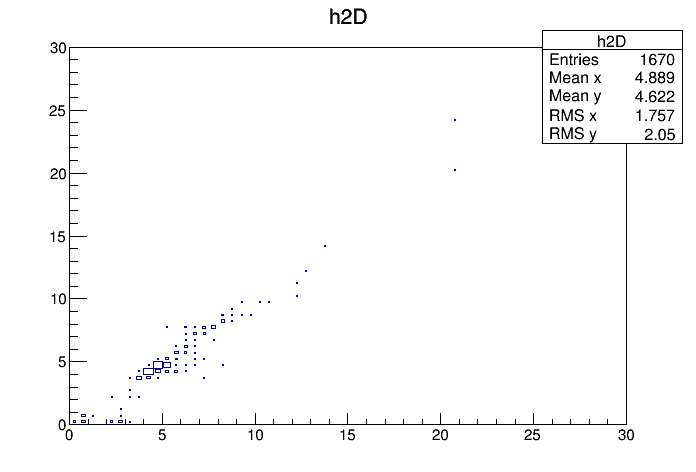

In [106]:
d=rootdisplay.FindCanvas(title="c1")
d.display(figFormat="png")

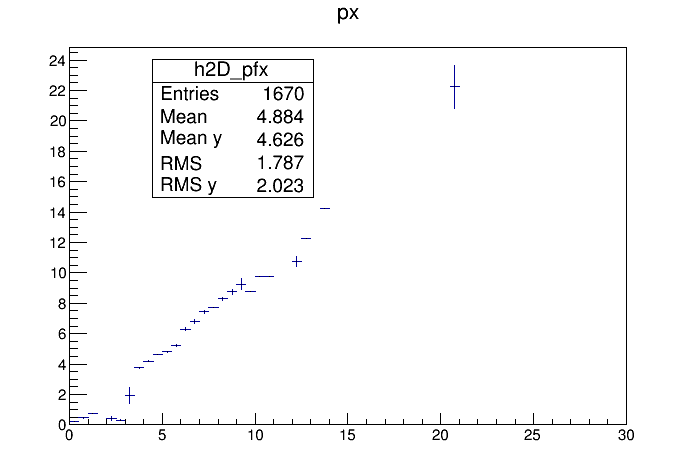

Fit:0: RuntimeWarning: Abnormal termination of minimization.
Fit:0: RuntimeWarning: Abnormal termination of minimization.
Fit:0: RuntimeWarning: Abnormal termination of minimization.
Fit:0: RuntimeWarning: Abnormal termination of minimization.
Fit:0: RuntimeWarning: Abnormal termination of minimization.
Fit:0: RuntimeWarning: Abnormal termination of minimization.


In [107]:
h2D_profX = h2D.ProfileX()
h2D_profX.SetTitle('px')
h2D_profX.Draw()
d.Draw()
d.display(figFormat="png")

### Fitting

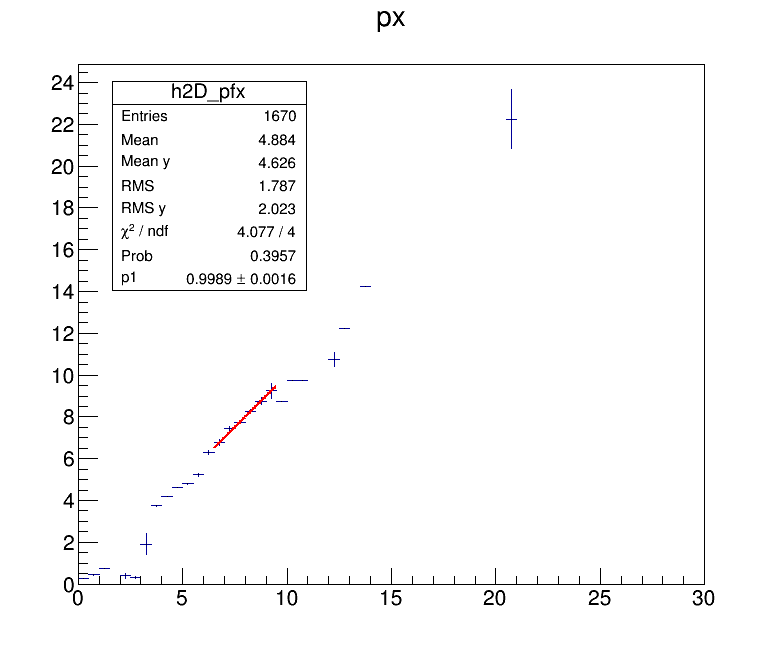

In [109]:
d.display(figFormat="png")

### Changing fit range

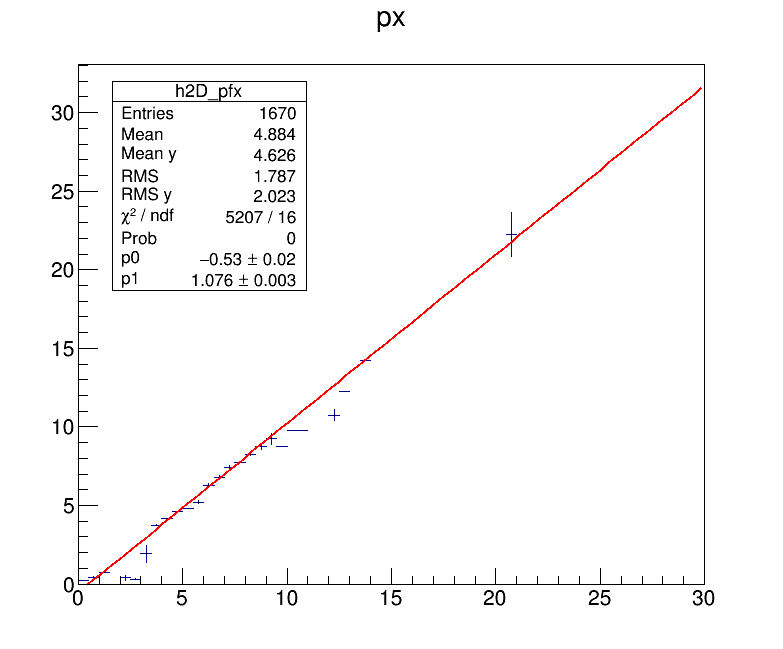

In [111]:
d.display(figFormat="png")

## Plot of each single metric

### cpu_system plots

bin size 0.20391424817
             count         mean          std          min          25%  \
count  1670.000000  1670.000000  1667.000000  1670.000000  1670.000000   
mean   1790.828743     4.889166     1.572205     2.817216     4.281578   
std     923.076813     1.757914     2.282895     1.837354     1.888063   
min       1.000000     0.346552     0.092828     0.000000     0.000000   
25%    1111.000000     4.259238     0.356532     0.604034     3.969776   
50%    1975.000000     4.820817     0.931746     3.645903     4.381569   
75%    2610.000000     5.468879     1.671829     3.771215     4.618524   
max    3088.000000    20.793552    14.187960    14.398730    22.760199   

               50%          75%          max  
count  1670.000000  1670.000000  1670.000000  
mean      4.621617     5.148897    19.933399  
std       2.051038     2.083828    23.715861  
min       0.042500     0.056444     4.325556  
25%       4.131365     4.323333     7.113056  
50%       4.602024     4.855

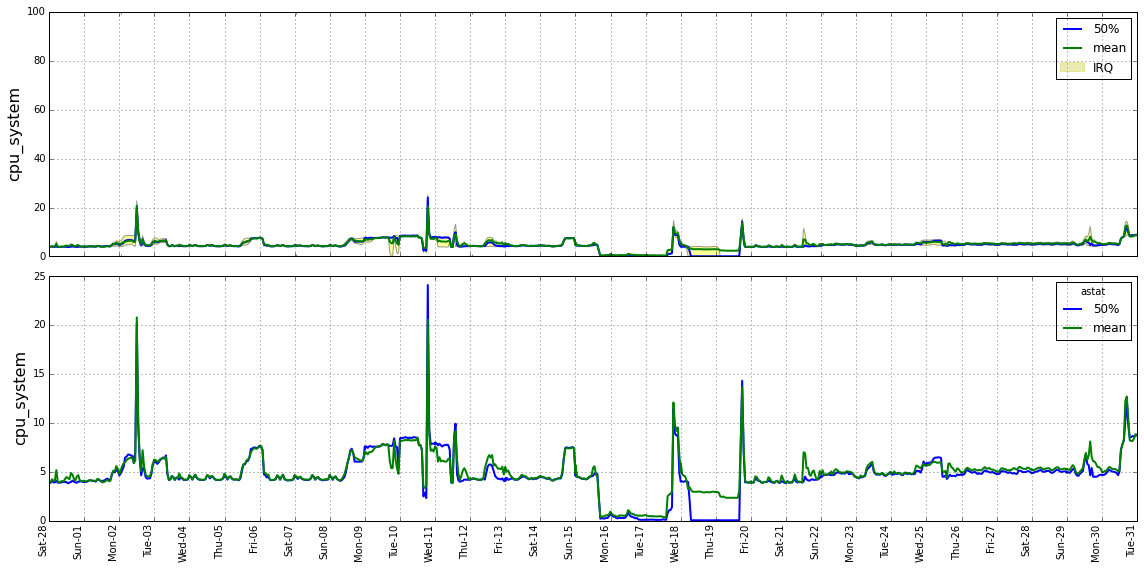

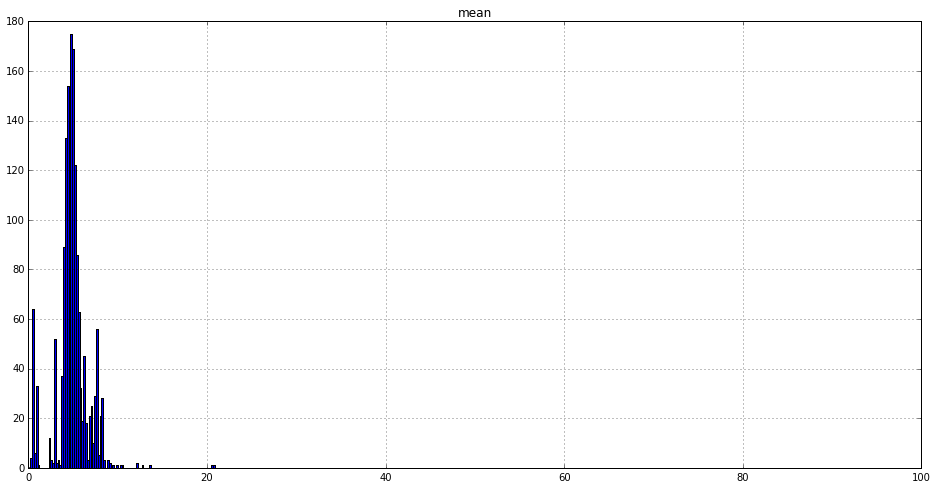

In [82]:
plotAllStats(pdf)

### cpu wio

bin size 0.0298722436588
             count         mean          std          min          25%  \
count  1667.000000  1667.000000  1667.000000  1667.000000  1667.000000   
mean   1794.049190     0.517986     1.396673     0.000631     0.071226   
std     920.774277     1.917635     3.348738     0.019521     0.922469   
min       2.000000     0.001998     0.002356     0.000000     0.000000   
25%    1111.000000     0.076220     0.143415     0.000000     0.002528   
50%    1975.000000     0.156479     0.395166     0.000000     0.006567   
75%    2610.500000     0.254390     1.333900     0.000000     0.019306   
max    3088.000000    50.901338    34.319895     0.790860    28.924627   

               50%          75%          max  
count  1667.000000  1667.000000  1667.000000  
mean      0.151984     0.350152    16.442090  
std       1.738768     2.421026    27.375644  
min       0.000000     0.000000     0.017500  
25%       0.007486     0.018672     1.771036  
50%       0.020056     0.0

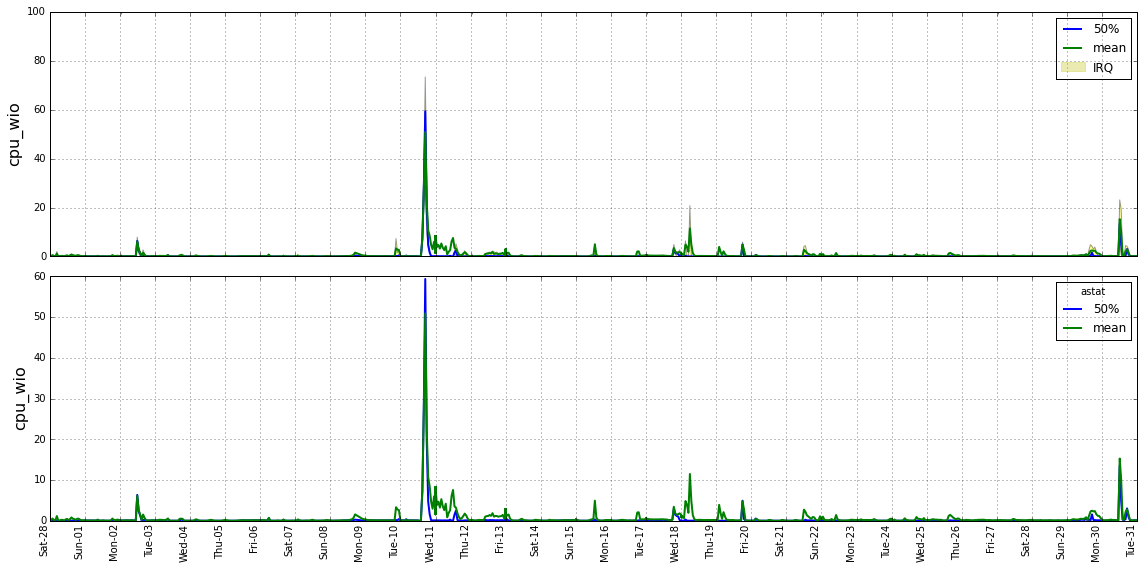

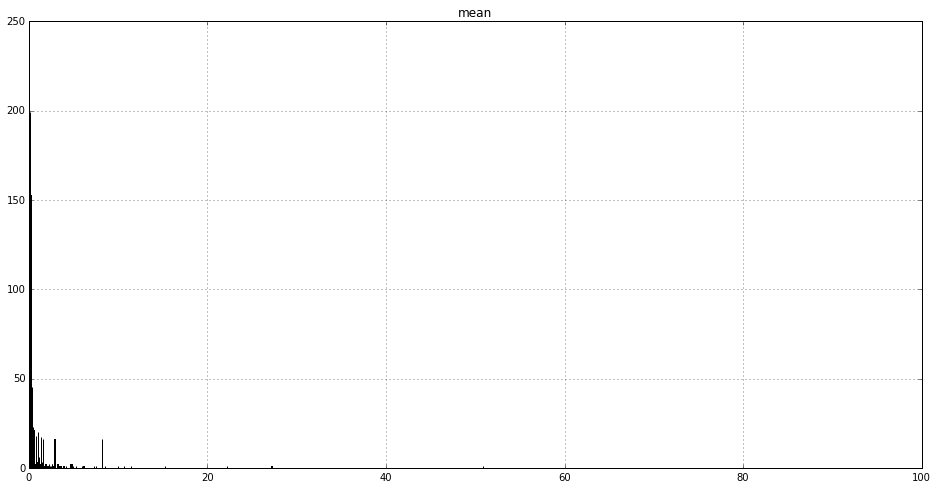

In [85]:
plotAllStats(pdf,ametric='cpu_wio')

#### Reduce y-axis scale

bin size 0.0298722436588
             count         mean          std          min          25%  \
count  1637.000000  1637.000000  1637.000000  1637.000000  1637.000000   
mean   1821.950519     0.328262     1.027714     0.000128     0.024127   
std     899.657133     0.602922     1.742013     0.002225     0.104880   
min       3.000000     0.001998     0.002356     0.000000     0.000000   
25%    1153.000000     0.074045     0.140803     0.000000     0.002500   
50%    1976.000000     0.156479     0.393117     0.000000     0.006567   
75%    2652.000000     0.244361     1.254308     0.000000     0.017139   
max    3088.000000     4.927037    17.505933     0.056722     2.999538   

               50%          75%          max  
count  1637.000000  1637.000000  1637.000000  
mean      0.065107     0.213420    15.354842  
std       0.211459     0.615289    26.241490  
min       0.000000     0.000000     0.017500  
25%       0.007458     0.018672     1.771036  
50%       0.018073     0.0

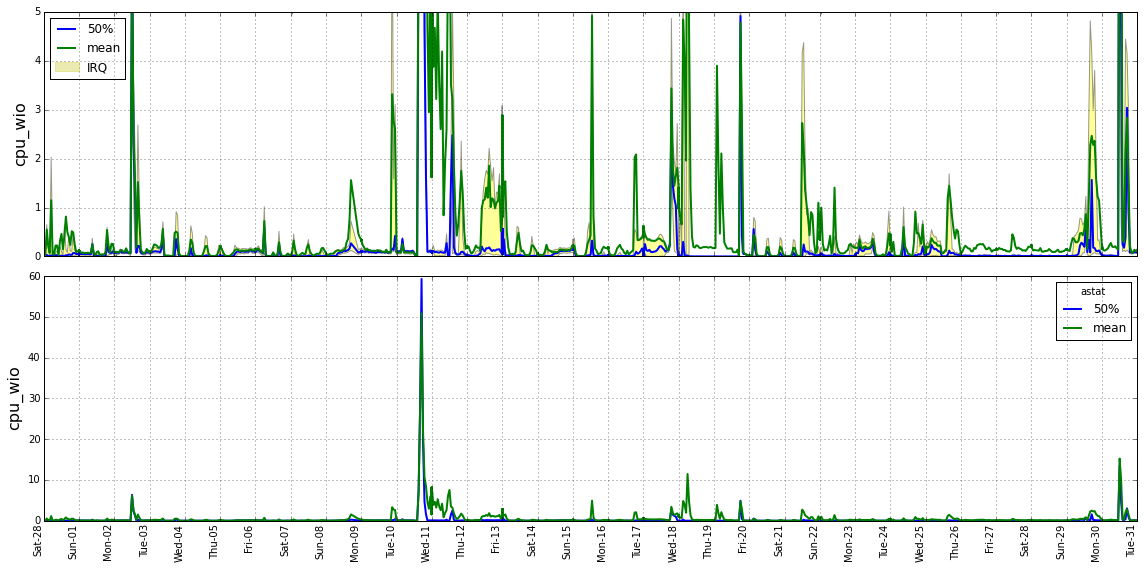

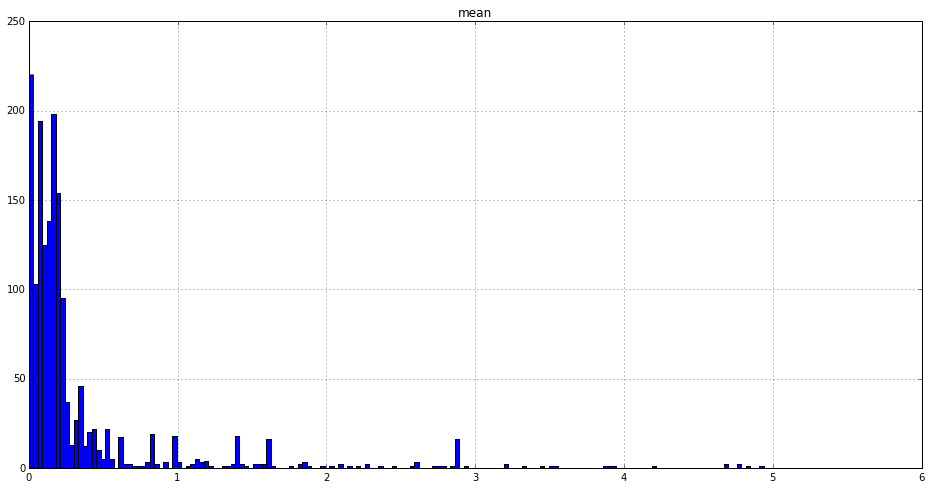

In [86]:

plotAllStats(pdf,ametric='cpu_wio',ylim=(0,5))

#### Comment about CPU wio performance

Methods to improve VM performance have been presented at CERN, in reference to CERN OpenStack setup

Presentation including those methods is here: https://indico.cern.ch/event/337567/session/6/contribution/17/material/slides/1.pdf

There is not possibility to compare VM performance reported in this talk with HN performance extracted here,
but just looking at the order of magnitude of the cpu_wio, it appears that the performance of HN VMs was equally good if not better, with a cpu_wio in average < 0.5% for the full production period, when averaged above all VMs

### cpu idle

bin size 10.8456358311
             count         mean          std          min          25%  \
count  1670.000000  1670.000000  1667.000000  1670.000000  1670.000000   
mean   1790.828743    31.304400    19.562101     3.751609    19.610811   
std     923.076813    34.208795    14.695698    16.617237    36.576265   
min       1.000000     0.080569     0.497283     0.000000     0.000000   
25%    1111.000000     2.393667     6.751856     0.000000     0.055792   
50%    1975.000000     8.700915    13.975847     0.000000     0.179986   
75%    2610.000000    66.731117    30.505611     0.000000     0.827419   
max    3088.000000    98.898910    54.418304    90.766667    99.927646   

               50%          75%          max  
count  1670.000000  1670.000000  1670.000000  
mean     30.372473    40.351448    93.671370  
std      41.594947    44.643530     7.810286  
min       0.000000     0.017694    15.251972  
25%       0.163305     0.389986    94.129042  
50%       0.418257     3.660

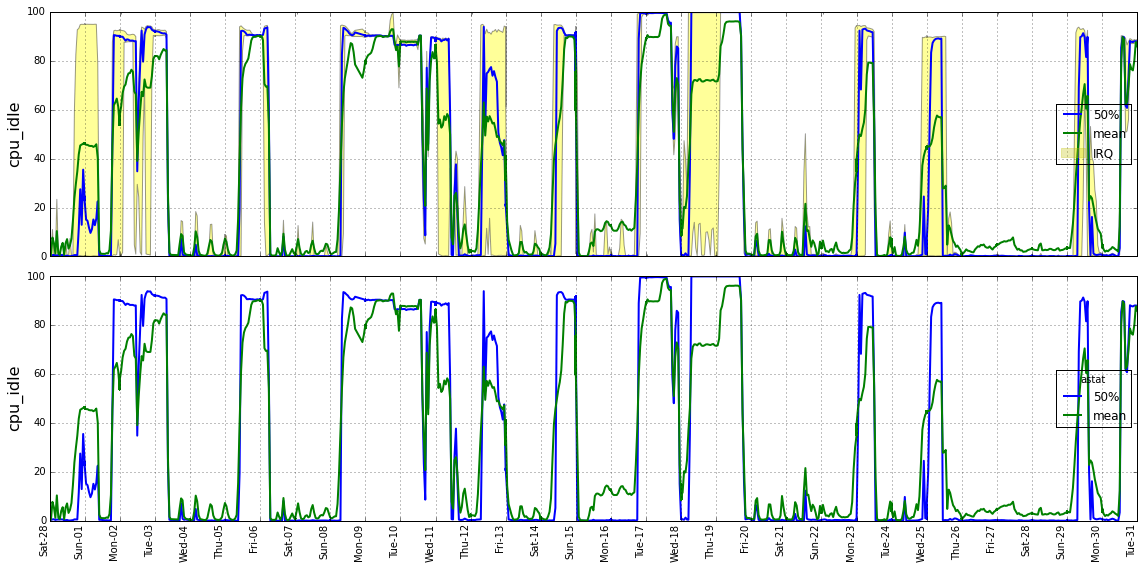

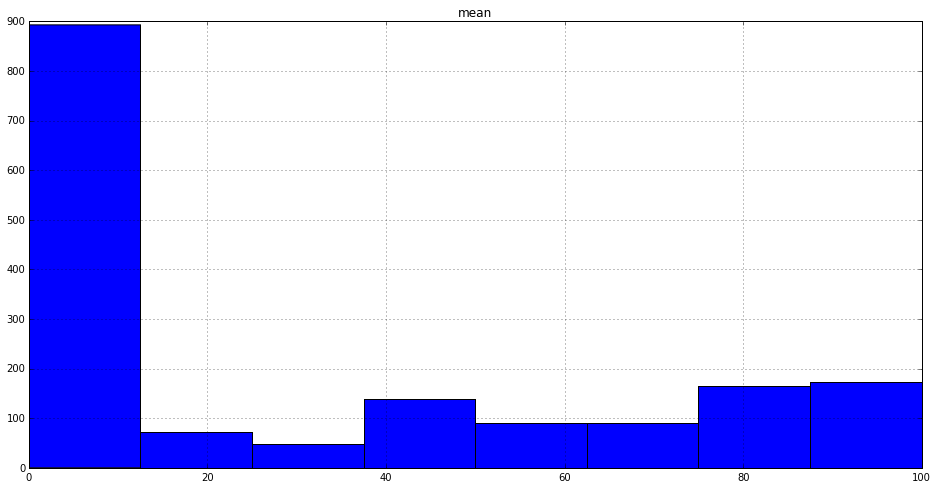

In [64]:
plotAllStats(pdf,ametric='cpu_idle')

### cpu nice

bin size 11.1522033463
             count         mean          std          min          25%  \
count  1667.000000  1667.000000  1667.000000  1667.000000  1667.000000   
mean   1794.049790    61.421196    20.223065     1.049080    52.628412   
std     920.774771    35.262864    15.194215     5.818639    45.344981   
min       2.000000     0.001667     0.002357     0.000000     0.000000   
25%    1111.000000    24.996431     6.493951     0.000000     0.000000   
50%    1975.000000    85.789837    14.891031     0.000000    90.203361   
75%    2610.500000    91.183017    31.436639     0.000000    93.686331   
max    3088.000000    94.638575    46.937013    77.466111    99.519056   

               50%          75%          max  
count  1667.000000  1667.000000  1667.000000  
mean     62.721974    73.847742    89.871137  
std      42.825606    38.232762    22.640015  
min       0.000000     0.000000     0.003333  
25%       0.378362    92.737627    94.657266  
50%      93.383274    94.070

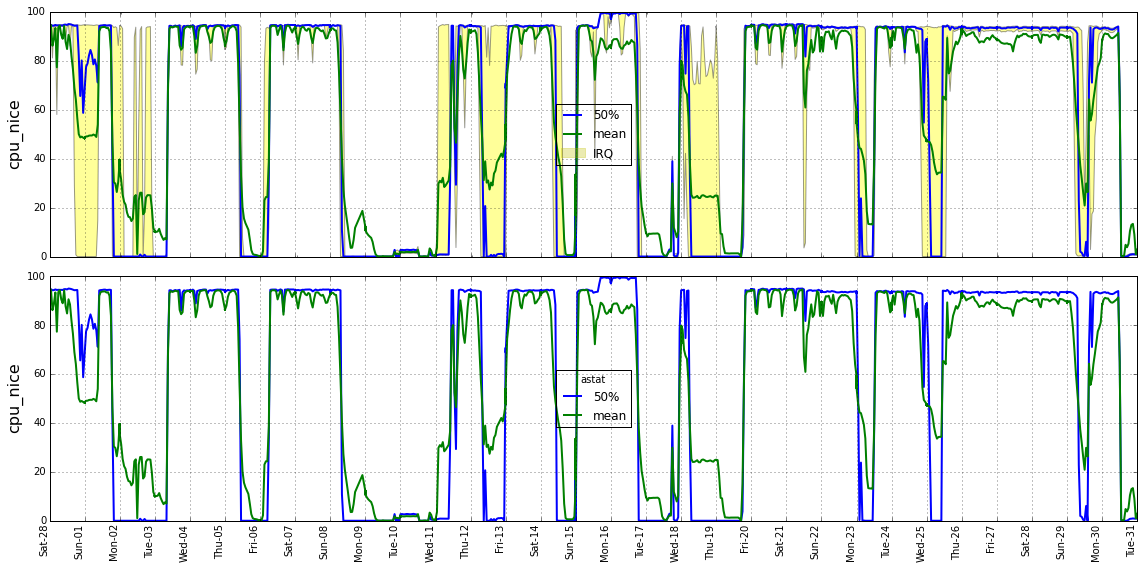

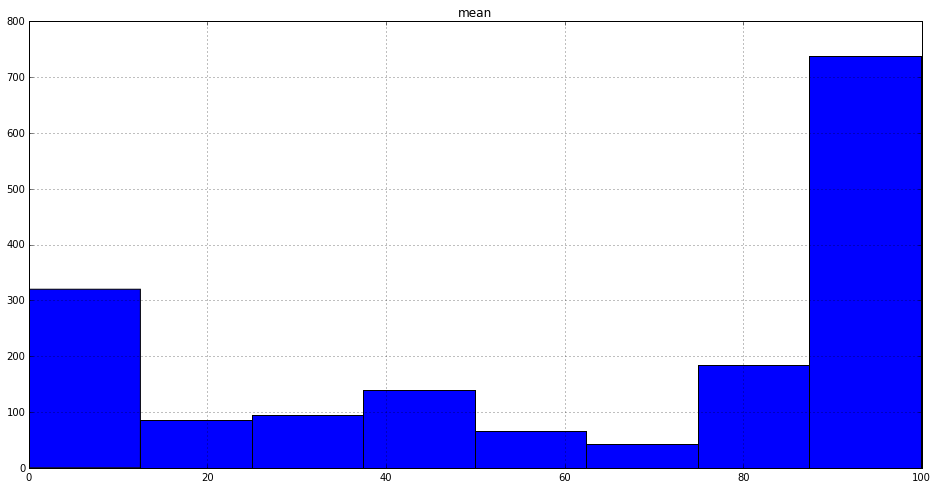

In [83]:
plotAllStats(pdf,ametric='cpu_nice')

### cpu user

bin size 0.130130929981
             count         mean          std          min          25%  \
count  1670.000000  1670.000000  1667.000000  1670.000000  1670.000000   
mean   1790.828743     2.004854     1.782775     0.845936     1.239799   
std     923.076813     2.365853     3.310314     0.512017     1.136401   
min       1.000000     0.082687     0.024765     0.000000     0.000000   
25%    1111.000000     1.215393     0.276838     0.681590     1.127559   
50%    1975.000000     1.433490     0.426091     1.020104     1.192951   
75%    2610.000000     1.987343     1.074009     1.056111     1.264524   
max    3088.000000    34.778073    44.566516     5.995556    21.174493   

               50%          75%          max  
count  1670.000000  1670.000000  1670.000000  
mean      1.472115     1.937042    15.266934  
std       1.959495     3.250599    19.869226  
min       0.027576     0.042472     1.227056  
25%       1.157175     1.204552     2.955014  
50%       1.263767     1.37

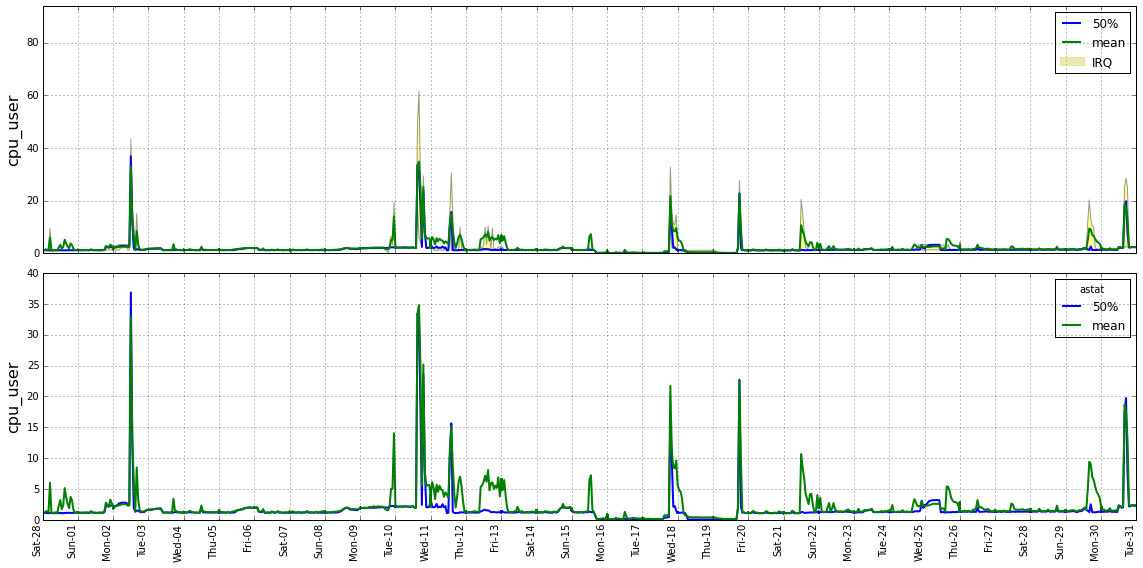

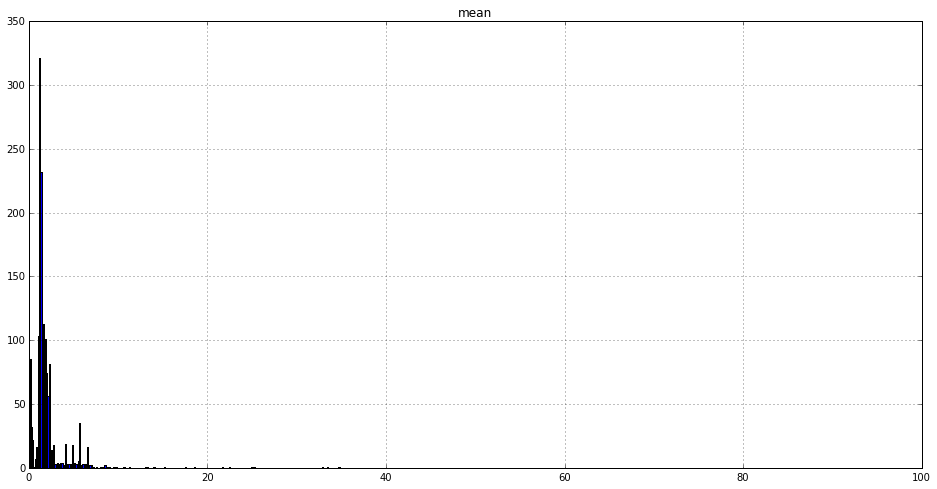

In [84]:
plotAllStats(pdf,ametric='cpu_user',)